# Task
## Part 1
* First, you will prepare the dataset for time series analysis:
    * Load in the Zillow Home Value Index dataframe.
        * Note: it is a large file and may take a minute to load.
    * Filter the 4 largest cities into a new dataframe.
        * Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            * Therefore the 4 largest cities would have rank values of [0,1,2,3]
    * Melt the data to long-form and prepare it for time series analysis.
        * Convert the melted dates into datetime datatype.
        * Make the datetime column the index.
    * Resample the dataframe as monthly frequency, grouped by City.

### Part 2
* Once you've prepared the dataframe with the time series data for the 4 largest cities:
    * Plot the home values for all 4 cities. (Hint: use unstack)
        * Make sure to add a title and axis labels.
        * Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            * Hint: use the FuncFormatter from matplotlib.
    * Answer the following 2 questions using pandas:
        * 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
            * Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
        * 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
            * Hint: you can use .diff() to calculate the change in values

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

# PART 1

In [4]:
file_location = '/Users/Rashad/Documents/GitHub/CORE_Preparing_Time_Series_from_Wide_Form_Data/Data/zillow_data.csv'
df = pd.read_csv(file_location)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [5]:
melted = pd.melt(df.drop(columns=['RegionID','RegionType', 'StateName', 'Metro','CountyName','State']),
                 id_vars=['SizeRank','RegionName'],
                 var_name='Date', value_name='HomePrice')
melted

,SizeRank,RegionName,Date,HomePrice
0,0,New York,2000-01-31,253690.0
1,1,Los Angeles,2000-01-31,234181.0
2,2,Houston,2000-01-31,109068.0
3,3,Chicago,2000-01-31,166139.0
4,4,San Antonio,2000-01-31,114794.0
...,...,...,...,...
6133486,28439,Palisades,2022-09-30,192110.0
6133487,28439,Port Mansfield,2022-09-30,264685.0
6133488,28439,Tribes Hill,2022-09-30,142438.0
6133489,28439,Derby Center,2022-09-30,266255.0


In [6]:
# converting wide-form data to long-long(NOTE: LONG-FORM is how we typically work with data)
melted['Date'] = pd.to_datetime(melted['Date'], format='%Y-%m-%d')

display(melted.head(2))   #quick view of data
print()
melted.info()   #confirming change to datatype

,SizeRank,RegionName,Date,HomePrice
0,0,New York,2000-01-31,253690.0
1,1,Los Angeles,2000-01-31,234181.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133491 entries, 0 to 6133490
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   SizeRank    int64         
 1   RegionName  object        
 2   Date        datetime64[ns]
 3   HomePrice   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 187.2+ MB


In [7]:
melted.isna().sum()  #checking for missing values

SizeRank            0
RegionName          0
Date                0
HomePrice     1749281
dtype: int64

In [8]:
#Dropping 
#    melted.dropna(axis=0, inplace=True)

In [9]:
melted.isna().sum()  #checking for missing values

SizeRank            0
RegionName          0
Date                0
HomePrice     1749281
dtype: int64

In [10]:
#setting 'Date' column as index so that I can perform time series analysis.
melted = melted.set_index("Date")
melted

,SizeRank,RegionName,HomePrice
Date,,,
2000-01-31,0,New York,253690.0
2000-01-31,1,Los Angeles,234181.0
2000-01-31,2,Houston,109068.0
2000-01-31,3,Chicago,166139.0
2000-01-31,4,San Antonio,114794.0
...,...,...,...
2022-09-30,28439,Palisades,192110.0
2022-09-30,28439,Port Mansfield,264685.0
2022-09-30,28439,Tribes Hill,142438.0


In [11]:
#Top 4 largest cites
top4_cities = melted[melted['SizeRank']<4]
top4_cities

,SizeRank,RegionName,HomePrice
Date,,,
2000-01-31,0,New York,253690.0
2000-01-31,1,Los Angeles,234181.0
2000-01-31,2,Houston,109068.0
2000-01-31,3,Chicago,166139.0
2000-02-29,0,New York,255517.0
...,...,...,...
2022-08-31,3,Chicago,315587.0
2022-09-30,0,New York,781622.0
2022-09-30,1,Los Angeles,966595.0


In [12]:
#resampling melted data
df_ts = top4_cities.groupby('RegionName').resample("M").sum()
df_ts

C:\Users\Rashad\AppData\Local\Temp\ipykernel_3576\4062401583.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = top4_cities.groupby('RegionName').resample("M").sum()
C:\Users\Rashad\AppData\Local\Temp\ipykernel_3576\4062401583.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = top4_cities.groupby('RegionName').resample("M").sum()
C:\Users\Rashad\AppData\Local\Temp\ipykernel_3576\4062401583.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whi

SizeRank  HomePrice
RegionName Date                           
Chicago    2000-01-31         3   166139.0
           2000-02-29         3   166536.0
           2000-03-31         3   167368.0
           2000-04-30         3   168826.0
           2000-05-31         3   170499.0
...                         ...        ...
New York   2022-05-31         0   768797.0
           2022-06-30         0   773944.0
           2022-07-31         0   777692.0
           2022-08-31         0   779960.0
           2022-09-30         0   781622.0

[1092 rows x 2 columns]

# PART 2

In [13]:
unstacked = df_ts['HomePrice'].unstack(level=0)
unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


In [16]:
#Reformat the y-axis ticks to use thousands of dollars with a "K" at the end.
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

#function formatter
fmt_thous = mticks.FuncFormatter(thousands)

#Reformat y-axis ticks to use thousands of dollars and add "K"
ax.yaxis.set_major_formatter(fmt_thous)

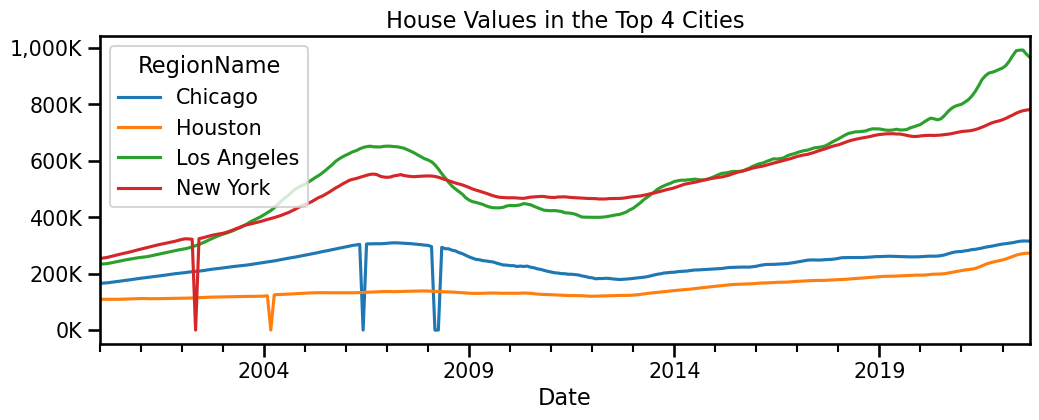

In [18]:
ax = unstacked.plot()
ax.set_title("House Values in the Top 4 Cities")

ax.yaxis.set_major_formatter(fmt_thous)

### Which City had the highest Typical Home Value at the end of 2008? Which had the least?

City with Highest Home Value in 2008:  Los Angeles
City with Lowest Home Value in 2008:  Houston

### How much did the home values change from November 2008 to December 2008 (in dollars)?

1. Chicago had a -5,753 dollar change.
2. Houston had a -964 dollar change.
3. Los Angeles had a -12,611 dollar change.
4. New York saw a -4,458 dollar change.

In [19]:
unstacked["November 2008":"December 2008"].diff()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0
